### Carregando as bibliotecas e configurações

In [71]:
import pandas as pd
import os
import json
from pathlib import Path
import locale
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [72]:
# Criando o caminho relativo da pasta com os arquivos JSON e capturando o nome dos arquivos
data_dir_caminho = Path('..') / 'data'
arquivos_json = [arq for arq in os.listdir(data_dir_caminho) if arq.endswith('.json')]

# Configurar locale para usar ponto como separador de milhar
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [107]:
# definindo e padronizando parâmetros para todos os gráficos
sns.set()
plt.style.use('seaborn-v0_8-notebook')
%matplotlib inline
rcParams['figure.figsize'] = 6,4
rcParams['figure.titlesize'] = 14
rcParams['font.size'] = 15

Notebook Color Scheme: 


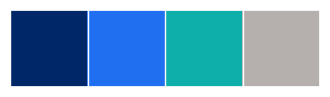

In [94]:
# color scheme
class clr:
    S = '\033[1m' + '\033[96m'
    E = '\033[0m'
    
my_colors = ['#002768', '#1F6FF0', '#0eafaa', '#B5B0AE']

sns.palplot(sns.color_palette(my_colors))

print(clr.S + "Notebook Color Scheme: " + clr.E)

### Carregando os datasets

In [3]:
# Carrega e concatena (parâmetro lines=True para evitar o aviso de Warning - lê cada linha como um objeto JSON separado)
dfs = []
for arquivo in arquivos_json:
    caminho = os.path.join(data_dir_caminho, arquivo)
    df = pd.read_json(caminho, lines=True)
    dfs.append(df)

df_final = pd.concat(dfs, ignore_index=True)
print(f"DataFrame final: {len(df_final)} linhas")

DataFrame final: 550068 linhas


In [4]:
print("O dataset tem " + str(df_final.shape[0]) + " observações (compras realizadas) e " + str(df_final.shape[1]) + " colunas: " + str([col for col in df_final.columns]))
df_final

O dataset tem 550068 observações (compras realizadas) e 7 colunas: ['usuario', 'produto', 'genero', 'idade', 'produto_categoria', 'valor', 'estado_civil']


,usuario,produto,genero,idade,produto_categoria,valor,estado_civil
0,1000001,P00069042,F,0-17,3,8370,0
1,1000001,P00248942,F,0-17,1,15200,0
2,1000001,P00087842,F,0-17,12,1422,0
3,1000001,P00085442,F,0-17,12,1057,0
4,1000002,P00285442,M,55+,8,7969,0
...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,20,368,1
550064,1006035,P00375436,F,26-35,20,371,0
550065,1006036,P00375436,F,26-35,20,137,1
550066,1006038,P00375436,F,55+,20,365,0


In [5]:
# trocando o nome da variável para melhorar a legibilidade do código
df = df_final.copy()

### Análise exploratória dos dados

In [7]:
# vê-se que o produto mais vendido é P00265242, que vendeu 1880 unidades
flavors = df['produto'].value_counts().reset_index().sort_values('count', ascending=False)
flavors

,produto,count
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
...,...,...
3626,P00325342,1
3627,P00312542,1
3628,P00008942,1
3629,P00315142,1


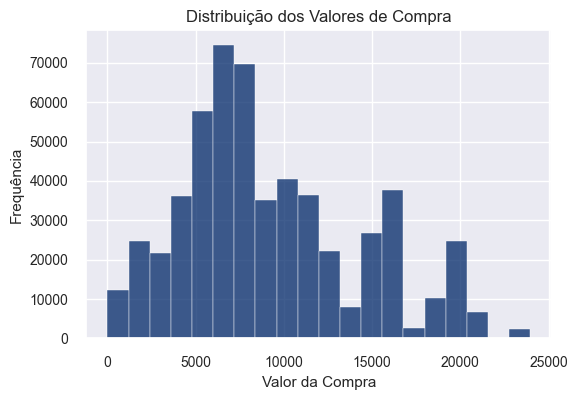

In [108]:
# Distribuição dos valores
sns.histplot(data=df, x='valor', bins=20, color='#002768')
plt.title('Distribuição dos Valores de Compra')
plt.xlabel('Valor da Compra')
plt.ylabel('Frequência')
plt.show()

Análise por dos valores de compra:
- Assimetria à direita (com a maioria das compras concentrada nos valores mais baixos) e algumas poucas compras com valores significativamente mais altos.
- Esta distribuição condiz com uma típica de dados de varejo, onde a maioria das transações envolve valores modestos, com algumas poucas transações de alto valor.
-  Há uma concentração significativa de compras nos primeiros intervalos de valor (provavelmente entre 1.000-5.000), que depois decai rapidamente conforme o valor aumenta.
- Valores atípicos: A cauda longa à direita sugere a presença de alguns valores atípicos (outliers)

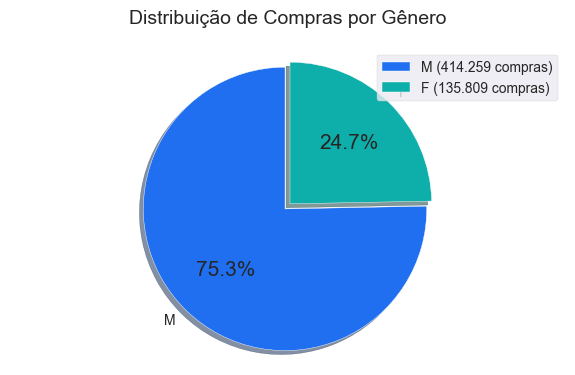

In [109]:
import matplotlib.pyplot as plt

# Contar compras por gênero
contagem_genero = df['genero'].value_counts()

# Criar o gráfico de pizza
plt.pie(contagem_genero, 
        labels=contagem_genero.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['#1F6FF0', '#0eafaa'],
        explode=(0.05, 0),  # Separar ligeiramente as fatias
        shadow=True)
plt.title('Distribuição de Compras por Gênero', y=1.05, fontsize=14)
plt.axis('equal')
plt.legend(
    labels=[f"{g} ({locale.format_string('%d', q, grouping=True)} compras)" 
            for g, q in zip(contagem_genero.index, contagem_genero)],
    loc='upper right'
)

plt.tight_layout()
plt.show()

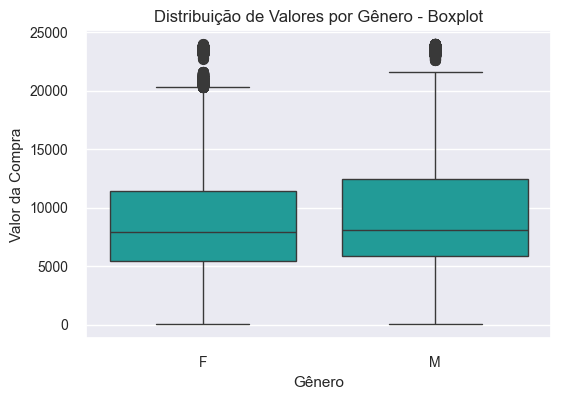

In [ ]:
# Boxplot por gênero
sns.boxplot(data=df, x='genero', y='valor', color='#0eafaa')
plt.title('Distribuição de Valores por Gênero - Boxplot')
plt.xlabel('Gênero')
plt.ylabel('Valor da Compra')
plt.show()

In [18]:
print(df.groupby('genero')['valor'].describe())

           count         mean          std   min     25%     50%      75%  \
genero                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
genero           
F       23959.0  
M       23961.0  


Análise por gênero
- mulheres tendem a fazer compras de valor mais modesto
- homens representam 75% das compras e tem maior variabilidade nos valores das compras e mediana mais elevada

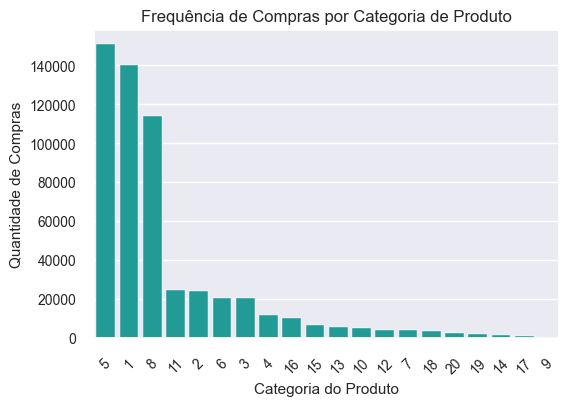

In [ ]:
# Frequência de Compras por Categoria de Produto
sns.countplot(data=df, x='produto_categoria', order=df['produto_categoria'].value_counts().index, color='#0eafaa')
plt.title('Frequência de Compras por Categoria de Produto')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Compras')
plt.xticks(rotation=45)
plt.show()

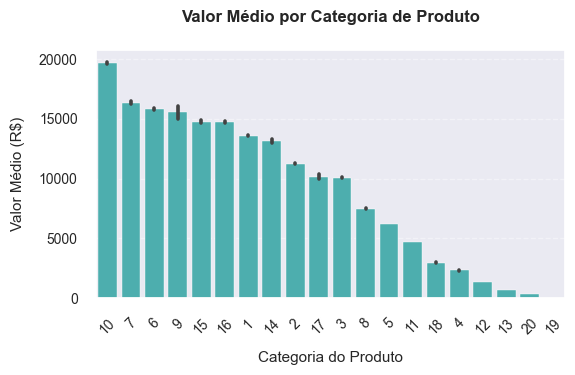

In [113]:
#Valor Médio por Categoria de Produto
sns.barplot(data=df, 
           x='produto_categoria', 
           y='valor',
           estimator='mean',
           order=df.groupby('produto_categoria')['valor'].mean().sort_values(ascending=False).index,
           color='#04F7F7',
           saturation=0.4)

plt.title('Valor Médio por Categoria de Produto', pad=20, fontweight='bold')
plt.xlabel('Categoria do Produto', labelpad=10)
plt.ylabel('Valor Médio (R$)', labelpad=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Compras por Categoria de Produto
- As categorias 5, 1 e 8 se destacam na quantidade. Talvez separar processos mais ágeis de movimentação de estoque e entrega.
- A categoria 10 entrega um alto valor médio, embora seja um dos últimos em quantidade. Aqui pode existir uma oportunidade a ser estudada.

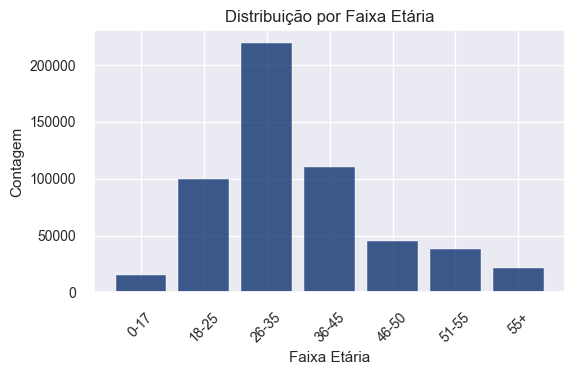

In [114]:
# Definir a ordem correta das faixas etárias e converter a coluna 'idade' para categoria ordenada
ordem_idades = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
df['idade'] = pd.Categorical(df['idade'], categories=ordem_idades, ordered=True)

sns.histplot(data=df, x='idade', shrink=0.8, color='#002768')
plt.title('Distribuição por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Perguntas do time de negócio

1 - Qual o ticket médio das vendas por idade ordenado por idade?

In [ ]:
ticket_medio = (
    df.query('idade.notna()', engine='python')
    .groupby('idade', observed=True)['valor']
    .mean()
    .reset_index()
    .rename(columns={'valor': 'ticket_medio'})
)

ticket_medio

,idade,ticket_medio
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55+,9336.280459



2 - Qual o total de vendas por idade ordenado pelo valor total de vendas?

3 - Liste a quantidade dos 10 produtos mais vendidos 

 4 - Quantos usuários únicos existem na base?

5 - Liste os 10 usuários com o maior valor total de vendas

6 - Qual porcentagem representa cada faixa etária da base de usuários únicos?